## **Create a machine learning model to predict revenue of the restaurant based on**
## **the features present in the dataset.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/revenue_prediction.csv')
data.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [ ]:
data.shape

(100, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [ ]:
data.describe()

,Id,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,100.000000,1.000000e+02
mean,150.500000,49.080000,4.086000,4.395161e+06
std,29.011492,22.370923,2.055101,2.659932e+06
min,101.000000,18.000000,1.000000,8.498700e+05
25%,125.750000,34.750000,2.750000,2.688328e+06
50%,150.500000,45.000000,3.650000,3.911401e+06
75%,175.250000,57.250000,5.100000,5.330084e+06
max,200.000000,126.000000,13.000000,1.969694e+07


In [ ]:
data.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

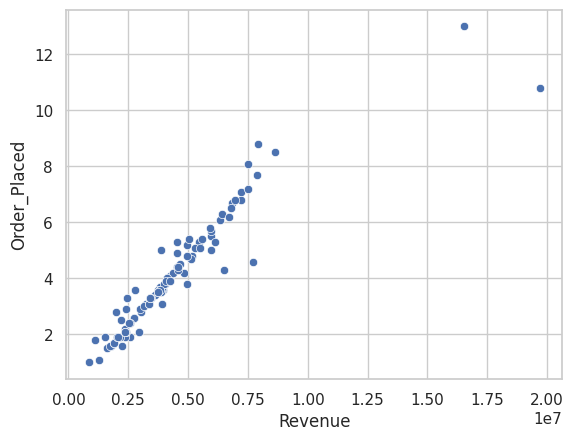

In [ ]:


sns.scatterplot(x = data['Revenue'], y = data['Order_Placed'])
plt.show()


In [ ]:
data.columns

Index(['Id', 'Name', 'Franchise', 'Category', 'City', 'No_Of_Item',
       'Order_Placed', 'Revenue'],
      dtype='object')

Percentage of restaurants with franchise: 55.00%
Percentage of restaurants without franchise: 45.00%


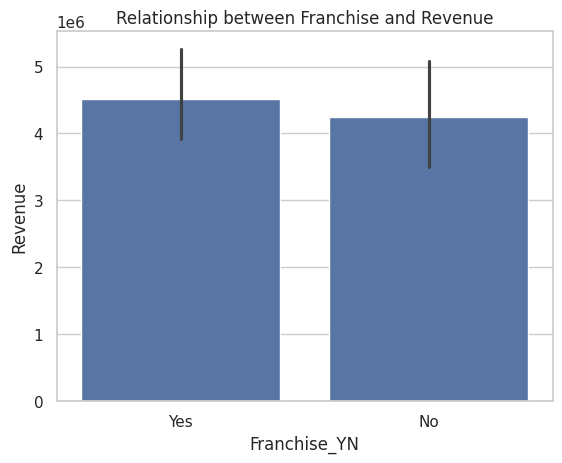

In [ ]:


# Create a new column 'Franchise_YN' to indicate whether a franchise is present or not
data['Franchise_YN'] = np.where(data['Franchise'] == 'Yes', 'Yes', 'No')

# Calculate the percentage of restaurants with and without franchise
franchise_yes_percent = (len(data[data['Franchise_YN'] == 'Yes'])) / len(data) * 100
franchise_no_percent = (len(data[data['Franchise_YN'] == 'No'])) / len(data) * 100

# Print the results
print(f"Percentage of restaurants with franchise: {franchise_yes_percent:.2f}%")
print(f"Percentage of restaurants without franchise: {franchise_no_percent:.2f}%")

# Create a bar chart to visualize the relationship between 'Franchise' and 'Revenue'
sns.barplot(x = 'Franchise_YN', y = 'Revenue', data = data)
plt.title('Relationship between Franchise and Revenue')
plt.show()


Top 3 Names with Highest Revenue:
- ZoesKitchen: 4.48%
- WhichWich: 3.77%
- Sizzler: 1.96%

Bottom 3 Names with Lowest Revenue:
- BigBoy/Frisch'sBigBoy: 0.19%
- Peet'sCoffee: 0.25%
- Wetzel'sPretzels: 0.29%


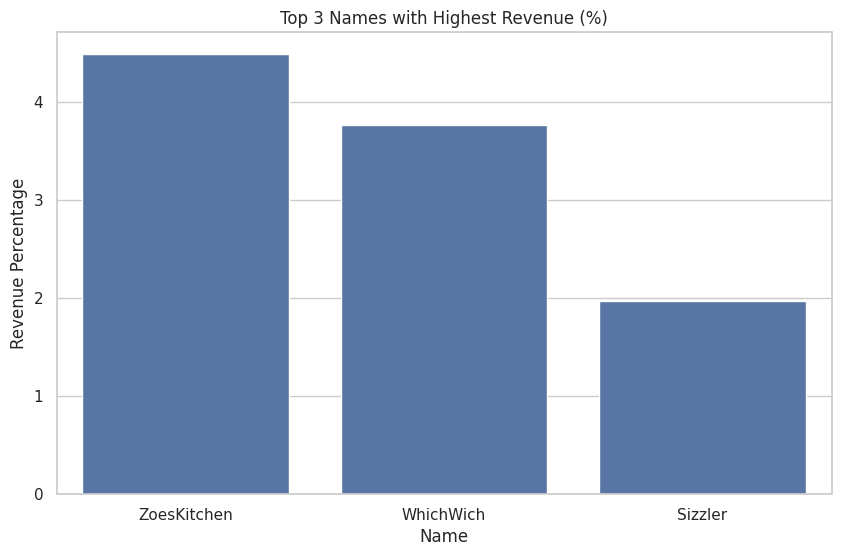

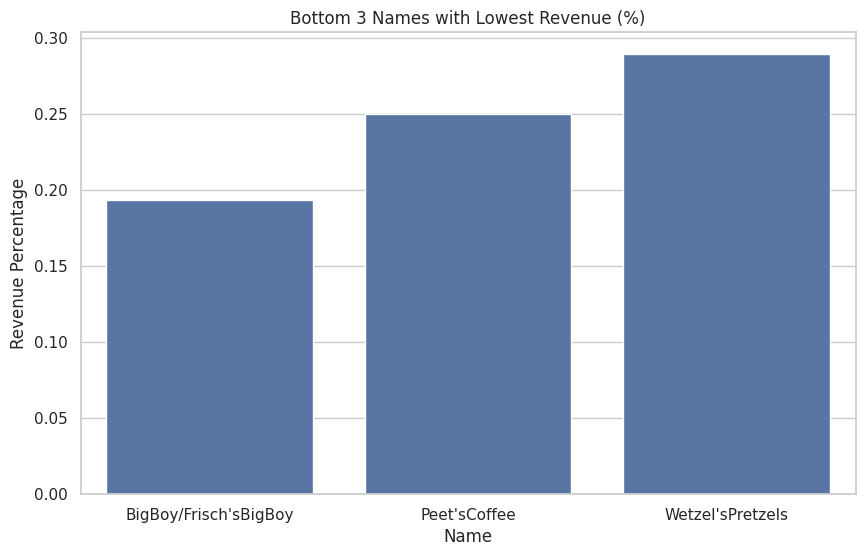

In [ ]:

# Top 3 names with highest revenue
top_3_names = data.groupby('Name')['Revenue'].sum().sort_values(ascending=False).head(3)
top_3_names_percentage = (top_3_names / total_revenue) * 100

print("Top 3 Names with Highest Revenue:")
for name, percentage in zip(top_3_names.index, top_3_names_percentage):
  print(f"- {name}: {percentage:.2f}%")

# Bottom 3 names with lowest revenue
bottom_3_names = data.groupby('Name')['Revenue'].sum().sort_values().head(3)
bottom_3_names_percentage = (bottom_3_names / total_revenue) * 100

print("\nBottom 3 Names with Lowest Revenue:")
for name, percentage in zip(bottom_3_names.index, bottom_3_names_percentage):
  print(f"- {name}: {percentage:.2f}%")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_names.index, y=top_3_names_percentage)
plt.title("Top 3 Names with Highest Revenue (%)")
plt.xlabel("Name")
plt.ylabel("Revenue Percentage")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_3_names.index, y=bottom_3_names_percentage)
plt.title("Bottom 3 Names with Lowest Revenue (%)")
plt.xlabel("Name")
plt.ylabel("Revenue Percentage")
plt.show()


Top 3 Cities with Highest Revenue:
- Bengaluru: 45.80%
- Mumbai: 18.56%
- Noida: 17.23%

Bottom 3 Cities with Lowest Revenue:
- Noida: 17.23%
- Pune: 9.70%
- Gurugram: 8.70%


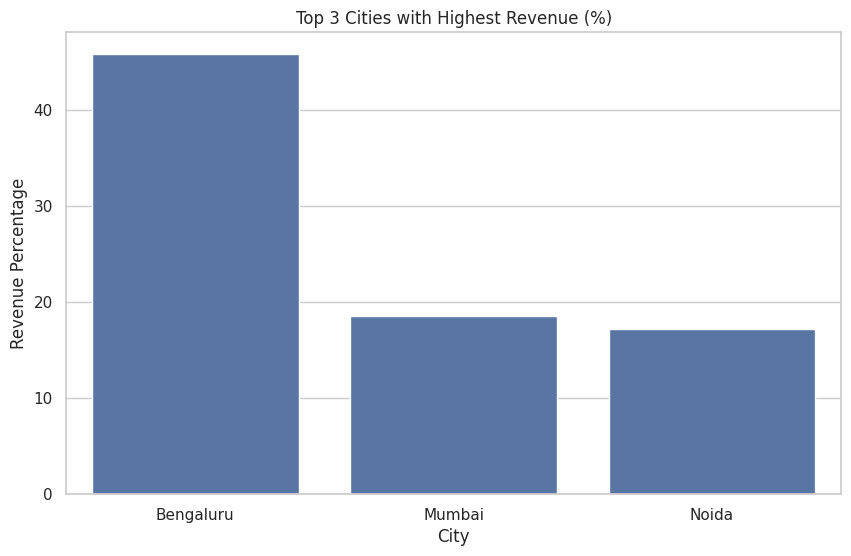

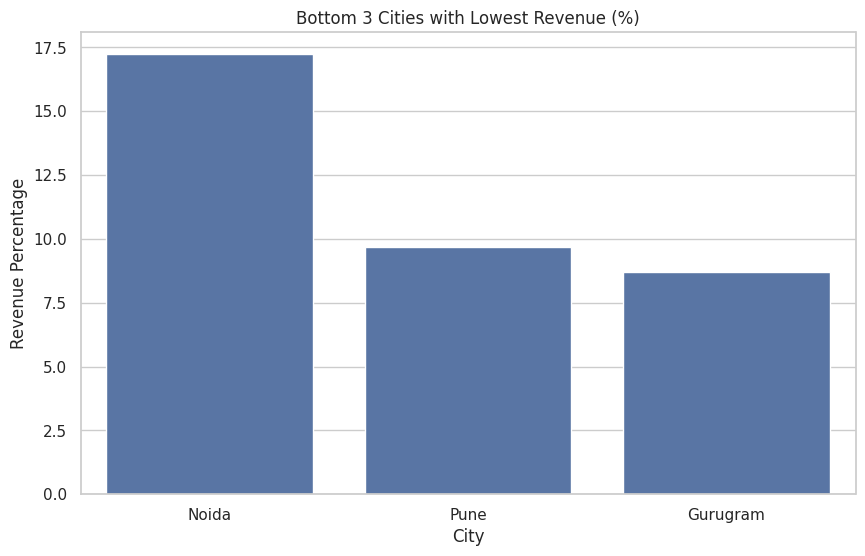

In [ ]:


# Calculate the total revenue for each city
city_revenue = data.groupby('City')['Revenue'].sum().sort_values(ascending=False)

# Select the top 3 and bottom 3 cities in terms of revenue
top_3_cities = city_revenue.head(3)
bottom_3_cities = city_revenue.tail(3)

# Calculate the percentage contribution of each city to total revenue
total_revenue = city_revenue.sum()
top_3_cities_percentage = (top_3_cities / total_revenue) * 100
bottom_3_cities_percentage = (bottom_3_cities / total_revenue) * 100

# Print the results
print("Top 3 Cities with Highest Revenue:")
for city, percentage in zip(top_3_cities.index, top_3_cities_percentage):
  print(f"- {city}: {percentage:.2f}%")

print("\nBottom 3 Cities with Lowest Revenue:")
for city, percentage in zip(bottom_3_cities.index, bottom_3_cities_percentage):
  print(f"- {city}: {percentage:.2f}%")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_cities.index, y=top_3_cities_percentage)
plt.title("Top 3 Cities with Highest Revenue (%)")
plt.xlabel("City")
plt.ylabel("Revenue Percentage")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_3_cities.index, y=bottom_3_cities_percentage)
plt.title("Bottom 3 Cities with Lowest Revenue (%)")
plt.xlabel("City")
plt.ylabel("Revenue Percentage")
plt.show()


Top 3 Categories with Highest Revenue:
- Varied Menu: 20.06%
- Burger: 8.77%
- Pizza: 8.75%

Bottom 3 Categories with Lowest Revenue:
- Healthy: 1.36%
- Coffee Cafe: 1.05%
- Sports Bar: 0.73%


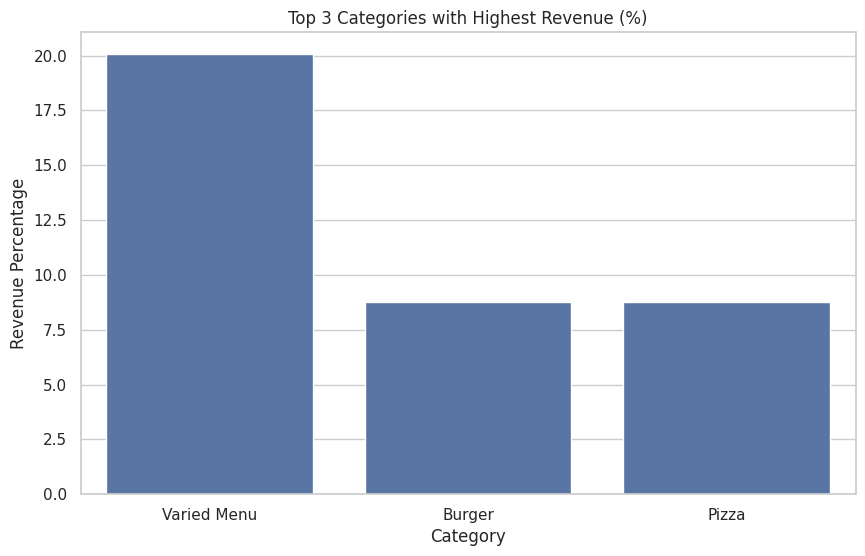

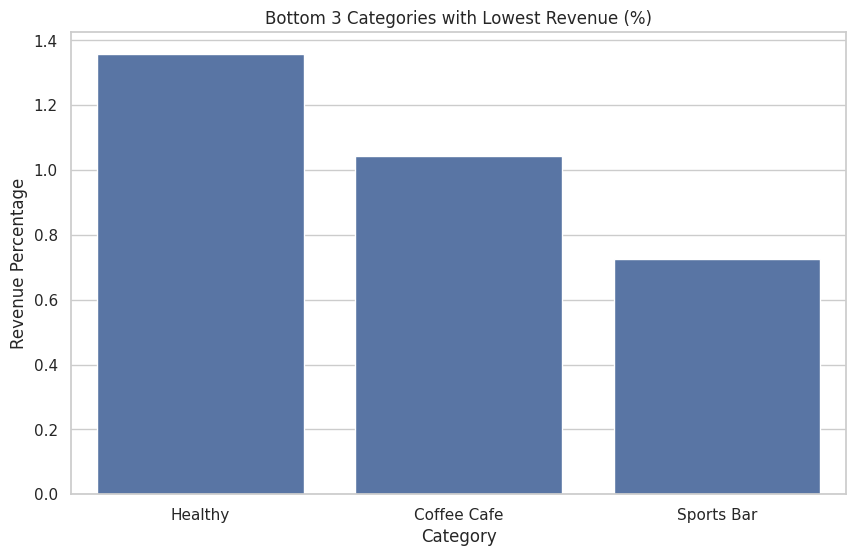

In [ ]:


# Calculate the total revenue for each category
category_revenue = data.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

# Select the top 3 and bottom 3 categories in terms of revenue
top_3_categories = category_revenue.head(3)
bottom_3_categories = category_revenue.tail(3)

# Calculate the percentage contribution of each category to total revenue
total_revenue = category_revenue.sum()
top_3_categories_percentage = (top_3_categories / total_revenue) * 100
bottom_3_categories_percentage = (bottom_3_categories / total_revenue) * 100

# Print the results
print("Top 3 Categories with Highest Revenue:")
for category, percentage in zip(top_3_categories.index, top_3_categories_percentage):
  print(f"- {category}: {percentage:.2f}%")

print("\nBottom 3 Categories with Lowest Revenue:")
for category, percentage in zip(bottom_3_categories.index, bottom_3_categories_percentage):
  print(f"- {category}: {percentage:.2f}%")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_categories.index, y=top_3_categories_percentage)
plt.title("Top 3 Categories with Highest Revenue (%)")
plt.xlabel("Category")
plt.ylabel("Revenue Percentage")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_3_categories.index, y=bottom_3_categories_percentage)
plt.title("Bottom 3 Categories with Lowest Revenue (%)")
plt.xlabel("Category")
plt.ylabel("Revenue Percentage")
plt.show()


In [ ]:
data.columns

Index(['Id', 'Name', 'Franchise', 'Category', 'City', 'No_Of_Item',
       'Order_Placed', 'Revenue', 'Franchise_YN'],
      dtype='object')

In [ ]:


data = data.drop('Id', axis=1)


In [ ]:
data = data.drop('Franchise', axis=1)

In [ ]:
data.head()

,Name,Category,City,No_Of_Item,Order_Placed,Revenue,Franchise_YN
0,HungryHowie'sPizza,Mexican,Bengaluru,55,5.5,5953753,Yes
1,CharleysPhillySteaks,Varied Menu,Gurugram,72,6.8,7223131,No
2,Chuy's,Chicken,Pune,25,1.9,2555379,Yes
3,O'Charley's,Italian/Pizza,Mumbai,18,2.5,2175511,Yes
4,PolloTropical,Pizza,Noida,48,4.2,4816715,Yes


               Revenue  No_Of_Item  Order_Placed
Revenue       1.000000    0.892194      0.929407
No_Of_Item    0.892194    1.000000      0.973335
Order_Placed  0.929407    0.973335      1.000000


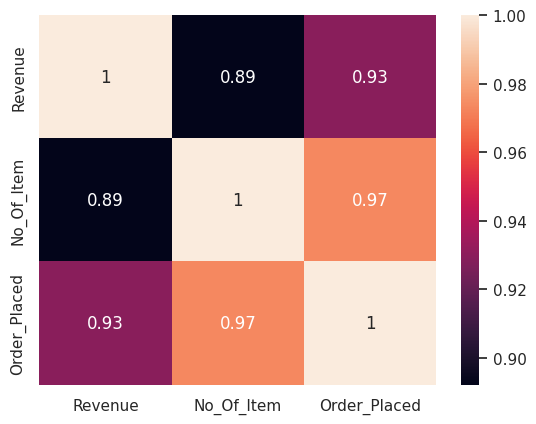

In [ ]:


# Calculate the correlation between 'Revenue' and other variables
correlation = data[['Revenue', 'No_Of_Item', 'Order_Placed']].corr()

# Print the correlation matrix
print(correlation)

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation, annot=True)
plt.show()


In [ ]:
data.columns

Index(['Name', 'Category', 'City', 'No_Of_Item', 'Order_Placed', 'Revenue',
       'Franchise_YN'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Name'] = le.fit_transform(data['Name'])
data['Category'] = le.fit_transform(data['Category'])
data['City'] = le.fit_transform(data['City'])
data['Franchise_YN'] = le.fit_transform(data['Franchise_YN'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          94 non-null     int64  
 1   Category      94 non-null     int64  
 2   City          94 non-null     int64  
 3   No_Of_Item    94 non-null     int64  
 4   Order_Placed  94 non-null     float64
 5   Revenue       94 non-null     int64  
 6   Franchise_YN  94 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.9 KB


<ipython-input-54-070a64d8e818>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Name'] = le.fit_transform(data['Name'])
<ipython-input-54-070a64d8e818>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Category'] = le.fit_transform(data['Category'])
<ipython-input-54-070a64d8e818>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
data.columns


Index(['Name', 'Category', 'City', 'No_Of_Item', 'Order_Placed', 'Revenue',
       'Franchise_YN'],
      dtype='object')

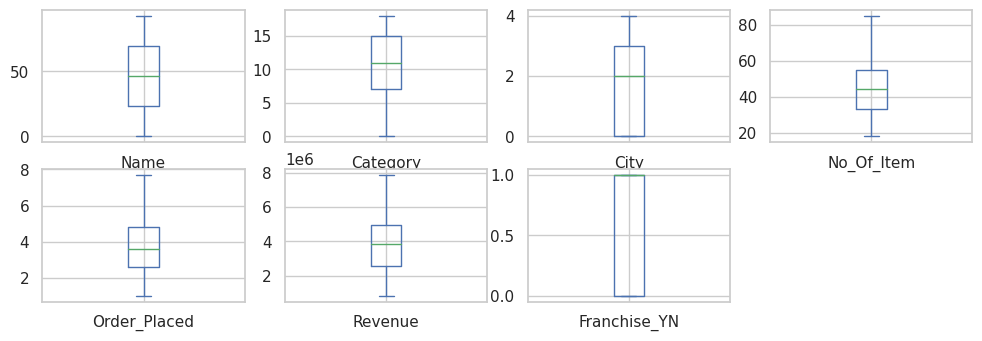

In [ ]:
data.plot.box(subplots=True, layout=(5, 4), sharex=True, figsize=(12, 10))
# Display the plots
plt.show()


In [ ]:


Q1 = data['No_Of_Item'].quantile(0.25)
Q3 = data['No_Of_Item'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
data = data[(data['No_Of_Item'] >= lower_limit) & (data['No_Of_Item'] <= upper_limit)]


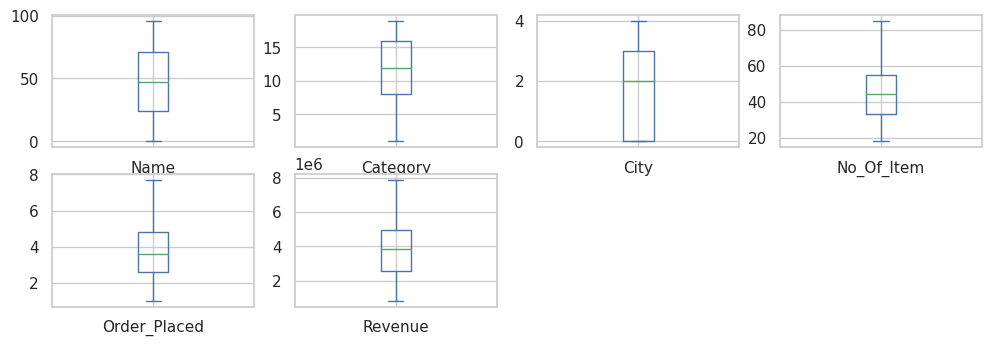

In [ ]:
data.plot.box(subplots=True, layout=(5, 4), sharex=True, figsize=(12, 10))
# Display the plots
plt.show()

In [ ]:


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Define the target variable and the features
y = data['Revenue']
X = data[['Name', 'Category', 'City', 'No_Of_Item', 'Order_Placed', 'Franchise_YN']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

# Calculate the coefficients of the model
coefficients = model.coef_

# Print the coefficients
for feature, coefficient in zip(X_train.columns, coefficients):
  print(f"{feature}: {coefficient:.4f}")


[2923268.00988812 3647977.87315537 3379887.57512882 3705210.01043605
 6034688.34435806 3436640.57732936 5233624.01149531 2427152.41993772
 3670218.31638265 8040910.37987815 1858613.87731067 5401772.92110932
 6738914.70610005 3909230.25760978 2004302.55628393 4366985.32018876
 5882191.37698752 2032595.85156367 4808613.75395415]
Mean squared error: 186922558330.06503
R-squared: 0.9236492646988901
Name: -4674.0111
Category: -7527.4573
City: -40552.3393
No_Of_Item: -4881.8313
Order_Placed: 1109091.5836
Franchise_YN: 147349.3743


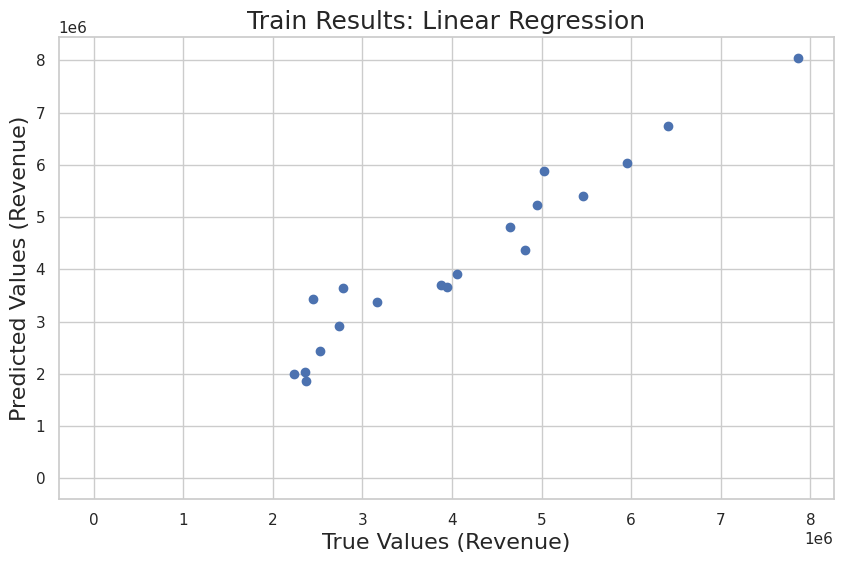

In [ ]:


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('True Values (Revenue)', fontsize=16)
plt.ylabel('Predicted Values (Revenue)', fontsize=16)
plt.title('Train Results: Linear Regression', fontsize=18)
plt.show()


In [ ]:


from sklearn.metrics import r2_score

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print(f"R-squared: {r2}")


R-squared: 0.9236492646988901


Mean squared error: 255475714476.54245
R-squared: 0.8956479152322672
Name: 0.0266
Category: 0.0172
City: 0.0089
No_Of_Item: 0.0690
Order_Placed: 0.8747
Franchise_YN: 0.0036


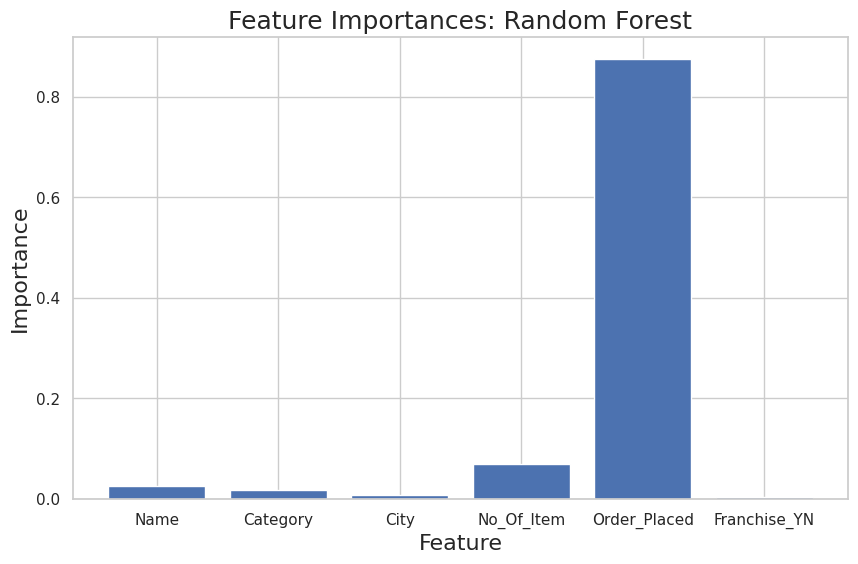

In [ ]:


from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

# Calculate the feature importances
importances = model.feature_importances_

# Print the feature importances
for feature, importance in zip(X_train.columns, importances):
  print(f"{feature}: {importance:.4f}")

# Create a bar chart of the feature importances
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, importances)
plt.xlabel('Feature', fontsize=16)
plt.ylabel('Importance', fontsize=16)
plt.title('Feature Importances: Random Forest', fontsize=18)
plt.show()

